## Analisis de Ritmo Circadiano.
El ritmo circadiano es una variable de confusión en la mayor parte de la fisiología y es importante tenerla en cuenta como característica, especialmente porque existe una conexión conocida entre el ritmo circadiano y la glucosa en sangre.
La frecuencia cardiaca y la acelerometría se han utilizado anteriormente para determinar los estados de vigilia frente a los de sueño.

In [531]:
PACIENTE = '016'
PATH_FOLDER = 'G:\\Dataset\\big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2\\'+PACIENTE+'\\'

In [532]:
import pandas as pd
import numpy as np

# Read the two CSV files
ACC = pd.read_csv(PATH_FOLDER + 'ACC_'+PACIENTE+'.csv')
HR = pd.read_csv(PATH_FOLDER + 'HR_'+PACIENTE+'.csv')

### Aplicamos el Resample

In [533]:
# Convertimos en fechas los datimetimes
ACC['datetime'] = pd.to_datetime(ACC['datetime'])
HR['datetime'] = pd.to_datetime(HR['datetime'])

In [534]:
print(ACC.columns)

## Añadimos el valor de la magnitud
ACC["magnitude"] = np.sqrt(ACC[' acc_x']**2 + ACC[' acc_y']**2 + ACC[' acc_z']**2)

ACC.head()

Index(['datetime', ' acc_x', ' acc_y', ' acc_z'], dtype='object')


,datetime,acc_x,acc_y,acc_z,magnitude
0,2020-07-16 09:29:03.000000,-39.0,-28.0,37.0,60.613530
1,2020-07-16 09:29:03.031250,-38.0,-27.0,37.0,59.514704
2,2020-07-16 09:29:03.062500,-37.0,-37.0,37.0,64.085880
3,2020-07-16 09:29:03.093750,-47.0,-27.0,41.0,67.963225
4,2020-07-16 09:29:03.125000,-39.0,-37.0,34.0,63.608176


In [535]:
# Resamplear y calcular la media y desviación estándar por minuto y hora para Heart Rate
hr_resampled_min = HR.resample('5min', on='datetime').agg({' hr': ['mean', 'std']})
hr_resampled_hour = HR.resample('H', on='datetime').agg({' hr': ['mean', 'std']})

# Resamplear y calcular la media y desviación estándar por minuto y hora para Acelerometría
acc_resampled_min = ACC.resample('5min', on='datetime').agg({'magnitude': ['mean', 'std']})
acc_resampled_hour = ACC.resample('H', on='datetime').agg({'magnitude': ['mean', 'std']})

In [536]:
# Calcular la media diaria de Heart Rate y Acelerometría para cada día
daily_stats_hr = HR.set_index('datetime').resample('D').agg({' hr': ['mean', 'std']})
daily_stats_acc = ACC.set_index('datetime').resample('D').agg({'magnitude': ['mean', 'std']})

In [537]:
# Combinamos la acelerometria y el ritmo cardiaco por minuto y por horas en 2 diferentes datasets
combined_df_min = pd.merge(acc_resampled_min, hr_resampled_min, on='datetime')
combined_df_min.head()

magnitude                    hr          
                          mean        std       mean       std
datetime                                                      
2020-07-16 09:25:00  65.035743  11.721119  92.710426  5.689590
2020-07-16 09:30:00  62.730299   3.857899  78.698367  5.966452
2020-07-16 09:35:00  62.568438   3.254793  72.131633  5.619535
2020-07-16 09:40:00  62.401744   3.242671  80.821033  6.748584
2020-07-16 09:45:00  62.548595   2.355077  75.150100  2.996422

In [538]:
combined_df_hour = pd.merge(acc_resampled_hour, hr_resampled_hour, on='datetime')
combined_df_hour.head()

magnitude                   hr           
                          mean       std       mean        std
datetime                                                      
2020-07-16 09:00:00  62.836575  4.116197  77.057385   6.135436
2020-07-16 10:00:00  63.699399  7.898439  88.877458  12.509688
2020-07-16 11:00:00  63.038655  4.180281  85.929608   9.778335
2020-07-16 12:00:00  63.215403  5.198428  81.495628   6.695853
2020-07-16 13:00:00  63.371440  6.171390  84.967678   9.679853

### Vamos a crear la funcion para añadir el indicador

In [539]:
# Renombrar las columnas para mayor claridad
combined_df_min.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in combined_df_min.columns.values]
combined_df_hour.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in combined_df_hour.columns.values]

In [540]:
combined_df_min['indicator_ritmo_circadiano'] = 1
combined_df_hour['indicator_ritmo_circadiano'] = 1

In [541]:
combined_df_min.head(5)

,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano
datetime,,,,,
2020-07-16 09:25:00,65.035743,11.721119,92.710426,5.689590,1
2020-07-16 09:30:00,62.730299,3.857899,78.698367,5.966452,1
2020-07-16 09:35:00,62.568438,3.254793,72.131633,5.619535,1
2020-07-16 09:40:00,62.401744,3.242671,80.821033,6.748584,1
2020-07-16 09:45:00,62.548595,2.355077,75.150100,2.996422,1


In [542]:
combined_df_hour.head(5)

,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano
datetime,,,,,
2020-07-16 09:00:00,62.836575,4.116197,77.057385,6.135436,1
2020-07-16 10:00:00,63.699399,7.898439,88.877458,12.509688,1
2020-07-16 11:00:00,63.038655,4.180281,85.929608,9.778335,1
2020-07-16 12:00:00,63.215403,5.198428,81.495628,6.695853,1
2020-07-16 13:00:00,63.371440,6.171390,84.967678,9.679853,1


In [543]:
daily_stats_hr.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in daily_stats_hr.columns.values]
daily_stats_acc.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in daily_stats_acc.columns.values]


In [544]:
daily_stats_acc.head()

,magnitude_mean,magnitude_std
datetime,,
2020-07-16,63.268604,5.447604
2020-07-17,63.421892,4.481207
2020-07-18,63.370911,5.149243
2020-07-19,63.459476,5.281314
2020-07-20,63.241599,5.531668


In [545]:
daily_stats_hr.head()

,hr_mean,hr_std
datetime,,
2020-07-16,88.218825,12.480305
2020-07-17,79.796861,12.413107
2020-07-18,85.967061,11.965133
2020-07-19,82.236113,14.305818
2020-07-20,84.051823,9.315179


In [546]:
combined_df_min['date'] = combined_df_min.index.date
combined_df_hour['date'] = combined_df_hour.index.date
combined_df_min.head()



,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano,date
datetime,,,,,,
2020-07-16 09:25:00,65.035743,11.721119,92.710426,5.689590,1,2020-07-16
2020-07-16 09:30:00,62.730299,3.857899,78.698367,5.966452,1,2020-07-16
2020-07-16 09:35:00,62.568438,3.254793,72.131633,5.619535,1,2020-07-16
2020-07-16 09:40:00,62.401744,3.242671,80.821033,6.748584,1,2020-07-16
2020-07-16 09:45:00,62.548595,2.355077,75.150100,2.996422,1,2020-07-16


In [547]:
# Cubrimos con 0 los NaN
combined_df_min['hr_mean'] = combined_df_min['hr_mean'].fillna(0)
combined_df_min['hr_std'] = combined_df_min['hr_std'].fillna(0)
combined_df_min['magnitude_mean'] = combined_df_min['magnitude_mean'].fillna(0)
combined_df_min['magnitude_std'] = combined_df_min['magnitude_std'].fillna(0)

combined_df_hour['hr_mean'] = combined_df_hour['hr_mean'].fillna(0)
combined_df_hour['hr_std'] = combined_df_hour['hr_std'].fillna(0)
combined_df_hour['magnitude_mean'] = combined_df_hour['magnitude_mean'].fillna(0)
combined_df_hour['magnitude_std'] = combined_df_hour['magnitude_std'].fillna(0)

In [548]:
# Función para agregar la columna indicador
def add_indicator_ritmo_circadiano(df_resampled, daily_stats_hr, daily_stats_acc):
    df_resampled['hr_mean_indicator'] = df_resampled.apply(
        lambda row: 1 if (
            row['hr_mean'] < daily_stats_hr.loc[str(row['date']), 'hr_mean']) else 0, axis=1
    )
    df_resampled['hr_std_indicator'] = df_resampled.apply(
        lambda row: 1 if (
            row['hr_std'] < daily_stats_hr.loc[str(row['date']), 'hr_std']) else 0, axis=1
    )
    df_resampled['magnitude_mean_indicator'] = df_resampled.apply(
        lambda row: 1 if (
            row['magnitude_mean'] < daily_stats_acc.loc[str(row['date']), 'magnitude_mean']) else 0, axis=1
    )
    df_resampled['magnitude_std_indicator'] = df_resampled.apply(
        lambda row: 1 if (
            row['magnitude_std'] < daily_stats_acc.loc[str(row['date']), 'magnitude_std']) else 0, axis=1
    )
    df_resampled['sum_indicator'] = df_resampled['hr_mean_indicator'] + df_resampled['hr_std_indicator'] + df_resampled['magnitude_mean_indicator'] + df_resampled['magnitude_std_indicator']
    df_resampled['indicator_ritmo_circadiano'] = df_resampled.apply( lambda x: 0 if (x['sum_indicator']>=2) else 1, axis=1)
    return df_resampled

In [549]:
# Agregar la columna indicador a los DataFrames combinados
combined_df_min = add_indicator_ritmo_circadiano(combined_df_min, daily_stats_hr, daily_stats_acc)
combined_df_hour = add_indicator_ritmo_circadiano(combined_df_hour, daily_stats_hr, daily_stats_acc)


In [550]:
combined_df_min.head()

,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano,date,hr_mean_indicator,hr_std_indicator,magnitude_mean_indicator,magnitude_std_indicator,sum_indicator
datetime,,,,,,,,,,,
2020-07-16 09:25:00,65.035743,11.721119,92.710426,5.689590,1,2020-07-16,0,1,0,0,1
2020-07-16 09:30:00,62.730299,3.857899,78.698367,5.966452,0,2020-07-16,1,1,1,1,4
2020-07-16 09:35:00,62.568438,3.254793,72.131633,5.619535,0,2020-07-16,1,1,1,1,4
2020-07-16 09:40:00,62.401744,3.242671,80.821033,6.748584,0,2020-07-16,1,1,1,1,4
2020-07-16 09:45:00,62.548595,2.355077,75.150100,2.996422,0,2020-07-16,1,1,1,1,4


In [551]:
combined_df_hour.head()

,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano,date,hr_mean_indicator,hr_std_indicator,magnitude_mean_indicator,magnitude_std_indicator,sum_indicator
datetime,,,,,,,,,,,
2020-07-16 09:00:00,62.836575,4.116197,77.057385,6.135436,0,2020-07-16,1,1,1,1,4
2020-07-16 10:00:00,63.699399,7.898439,88.877458,12.509688,1,2020-07-16,0,0,0,0,0
2020-07-16 11:00:00,63.038655,4.180281,85.929608,9.778335,0,2020-07-16,1,1,1,1,4
2020-07-16 12:00:00,63.215403,5.198428,81.495628,6.695853,0,2020-07-16,1,1,1,1,4
2020-07-16 13:00:00,63.371440,6.171390,84.967678,9.679853,0,2020-07-16,1,1,0,0,2


### Veamos algunas graficas

In [552]:
import matplotlib.pyplot as plt

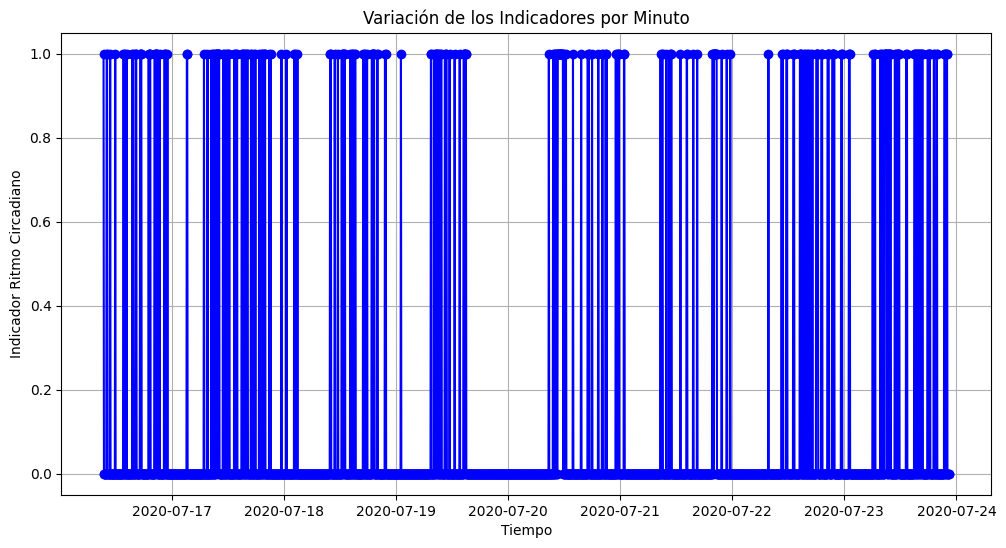

In [553]:
# Generar la gráfica de cómo varían los indicadores de los minutos
plt.figure(figsize=(12, 6))
plt.plot(combined_df_min.index, combined_df_min['indicator_ritmo_circadiano'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Indicador Ritmo Circadiano')
plt.title('Variación de los Indicadores por Minuto')
plt.grid(True)
plt.show()

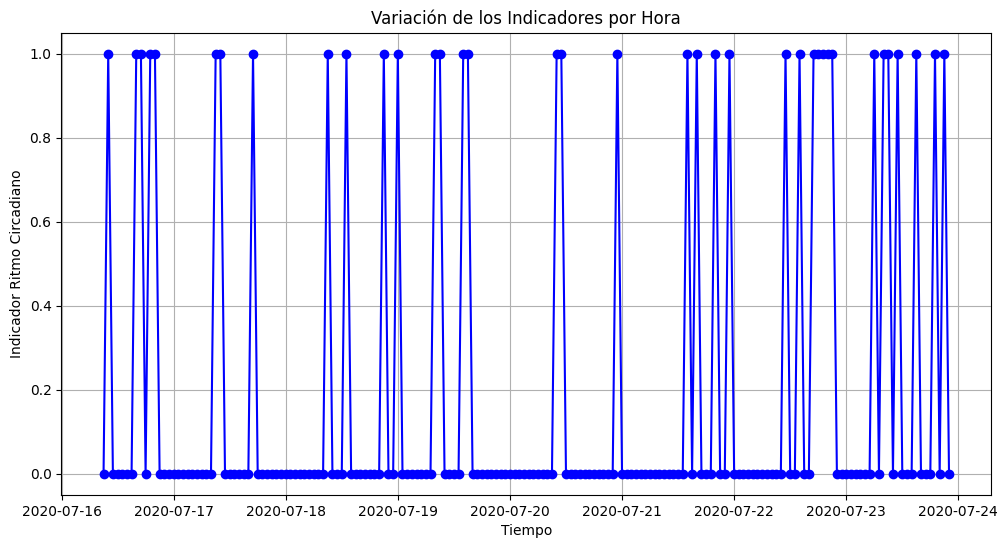

In [554]:
# Generar la gráfica de cómo varían los indicadores de los minutos
plt.figure(figsize=(12, 6))
plt.plot(combined_df_hour.index, combined_df_hour['indicator_ritmo_circadiano'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Indicador Ritmo Circadiano')
plt.title('Variación de los Indicadores por Hora')
plt.grid(True)
plt.show()

### Graficas de HR y Magnitud
Vamos a verificar donde suceden las pendientes de estos datos

#### Primero por Minutos

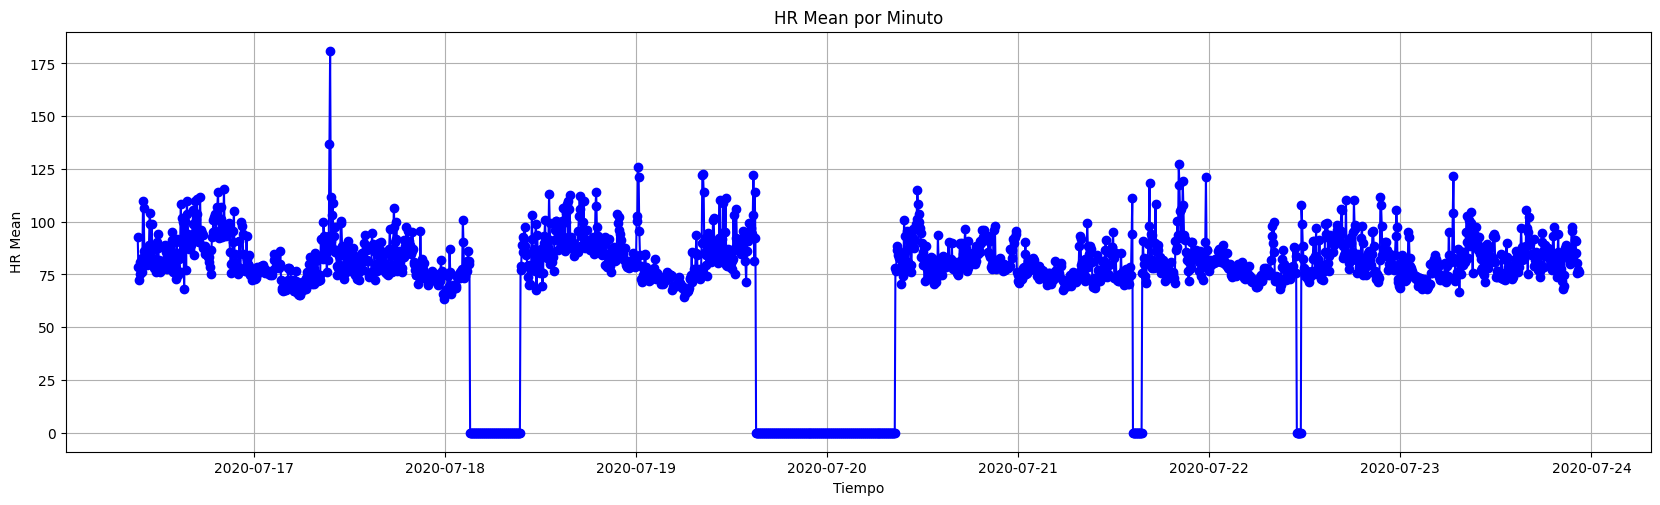

In [555]:
# Graficar hr_mean
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_min.index, combined_df_min['hr_mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('HR Mean')
plt.title('HR Mean por Minuto')
plt.grid(True)

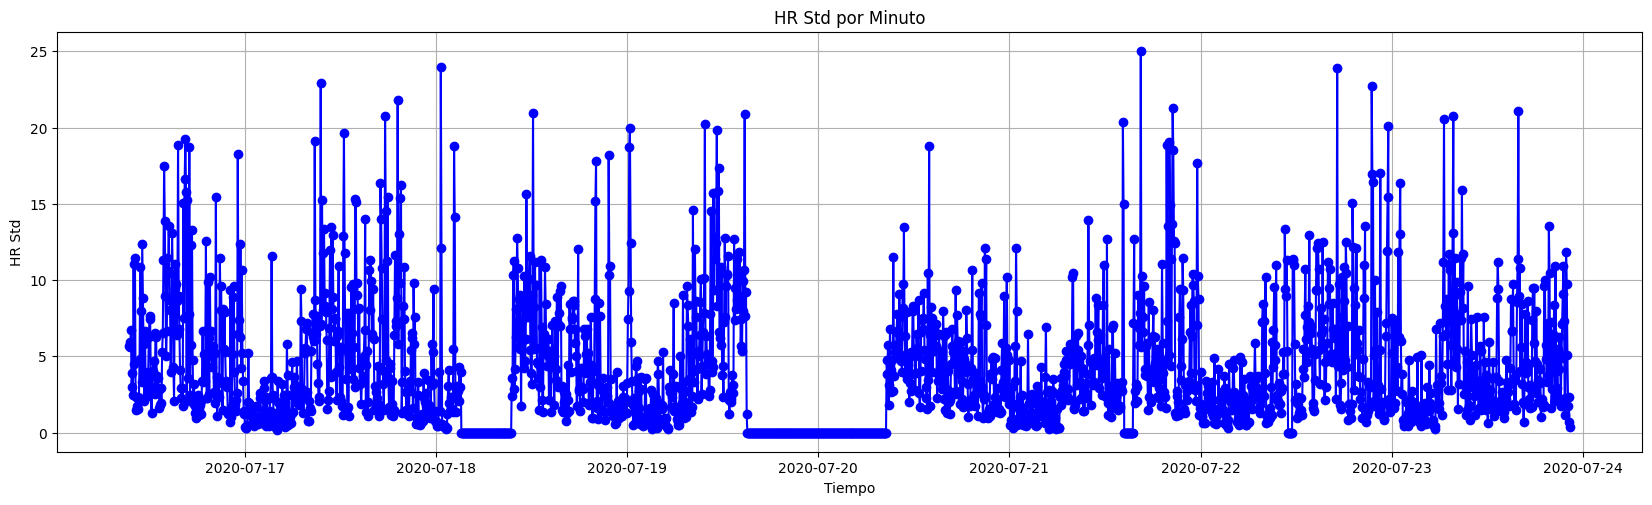

In [556]:
# Graficar hr_std
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_min.index, combined_df_min['hr_std'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('HR Std')
plt.title('HR Std por Minuto')
plt.grid(True)

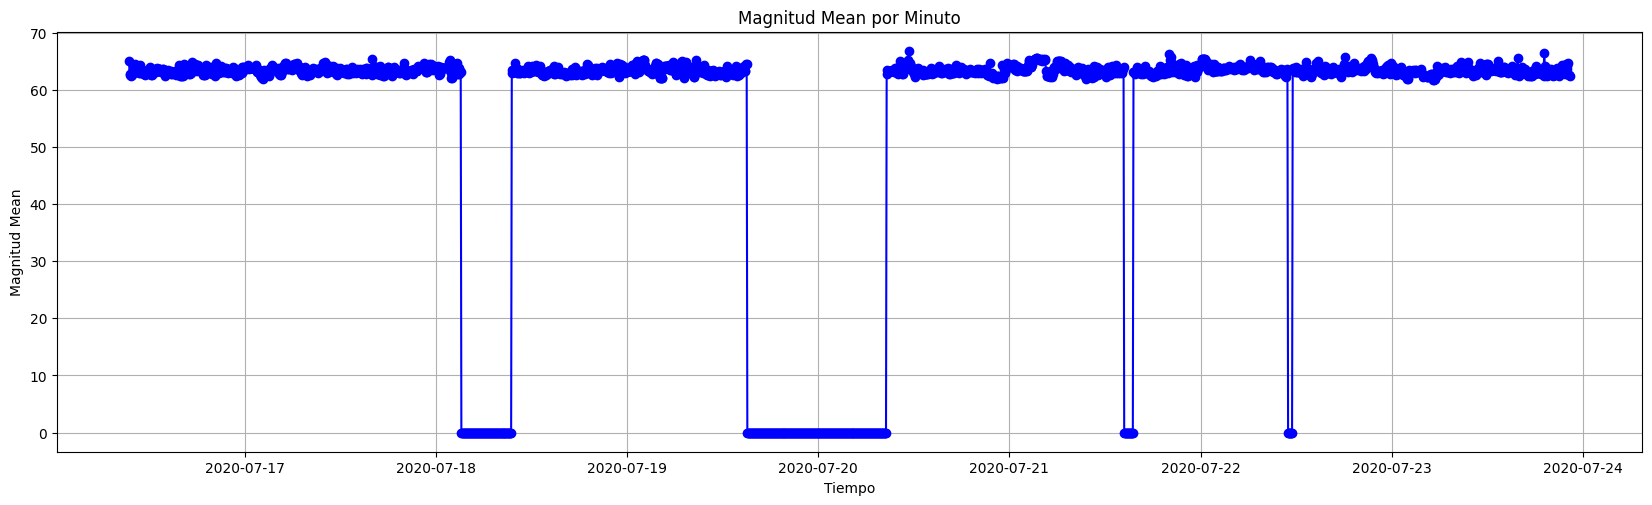

In [557]:
# Graficar magnitude_mean
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_min.index, combined_df_min['magnitude_mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud Mean')
plt.title('Magnitud Mean por Minuto')
plt.grid(True)

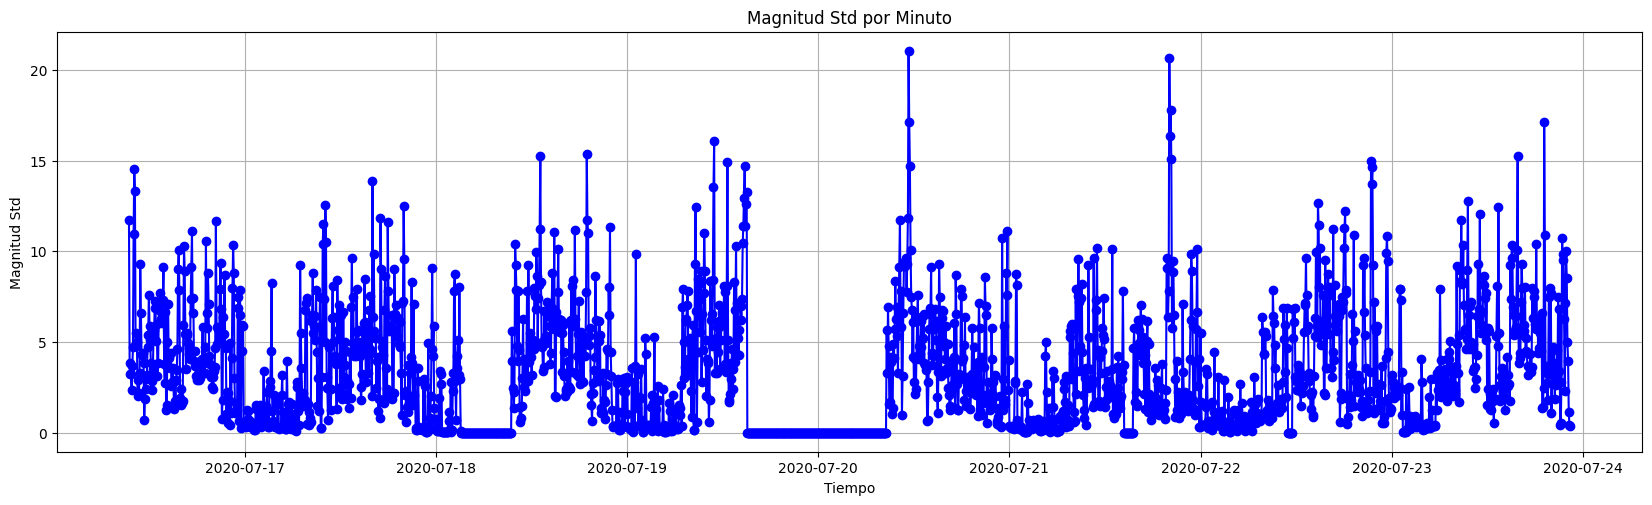

In [558]:
# Graficar magnitude_std
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_min.index, combined_df_min['magnitude_std'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud Std')
plt.title('Magnitud Std por Minuto')
plt.grid(True)

#### Ahora por horas

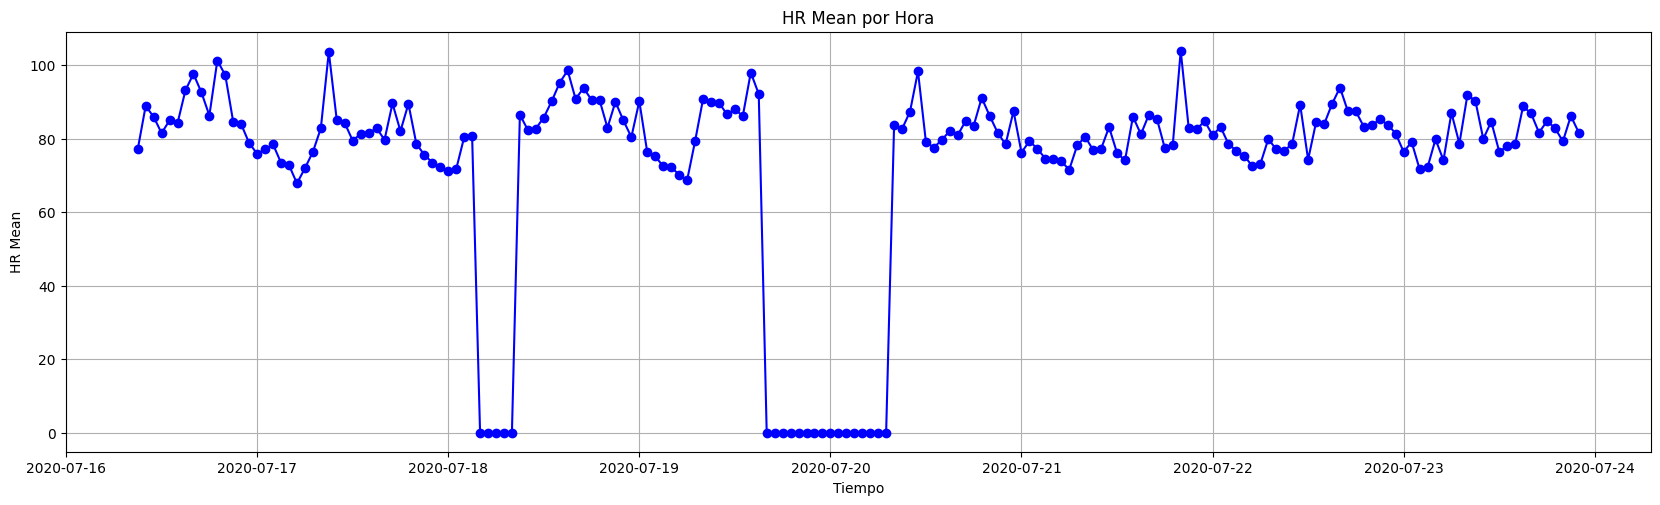

In [559]:
# Graficar hr_mean
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_hour.index, combined_df_hour['hr_mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('HR Mean')
plt.title('HR Mean por Hora')
plt.grid(True)

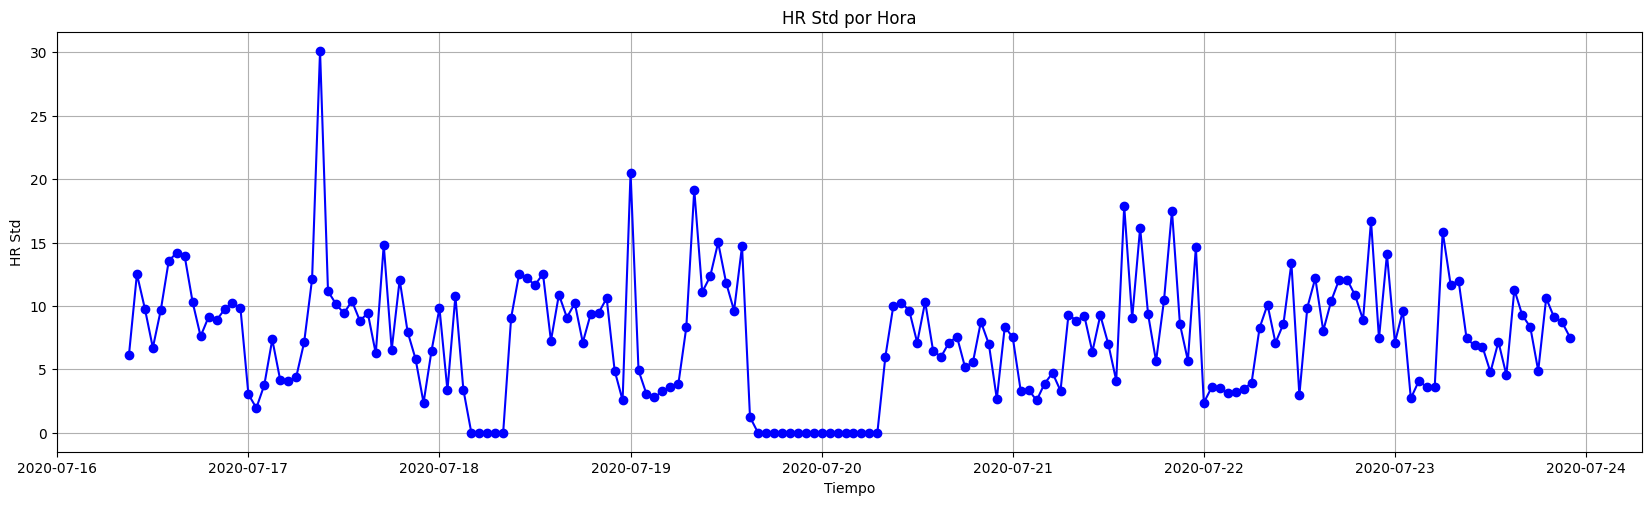

In [560]:
# Graficar hr_std
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_hour.index, combined_df_hour['hr_std'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('HR Std')
plt.title('HR Std por Hora')
plt.grid(True)

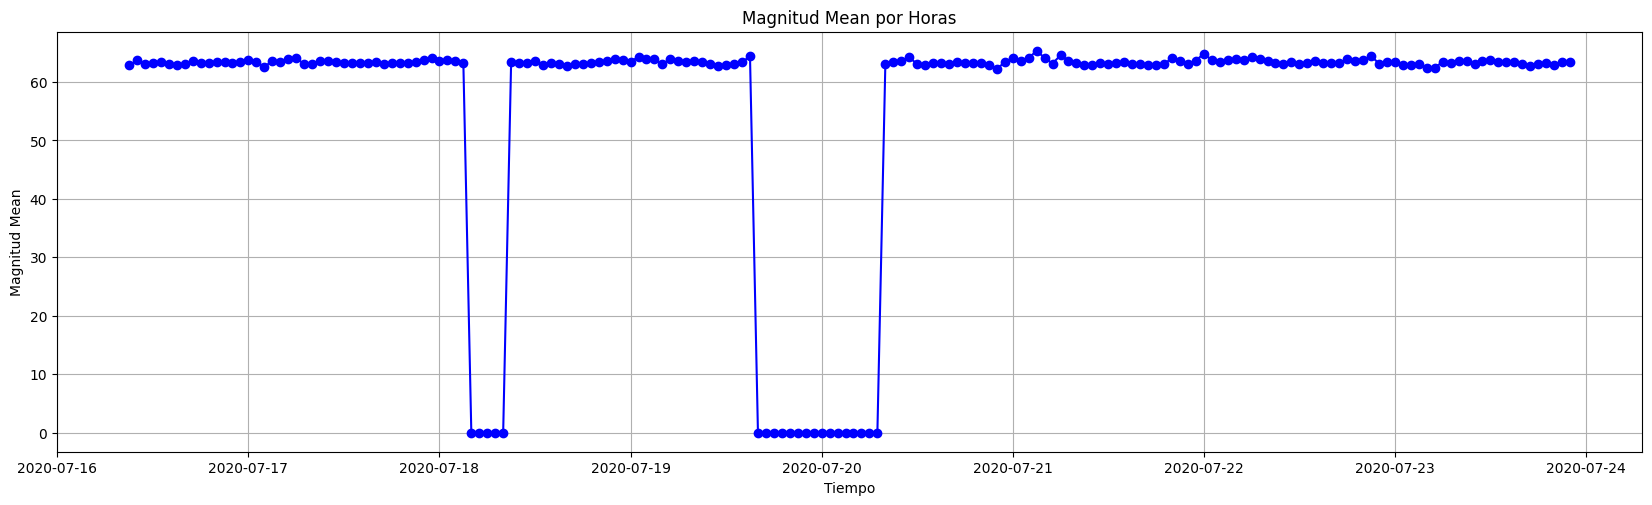

In [561]:
# Graficar magnitude_mean
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_hour.index, combined_df_hour['magnitude_mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud Mean')
plt.title('Magnitud Mean por Horas')
plt.grid(True)

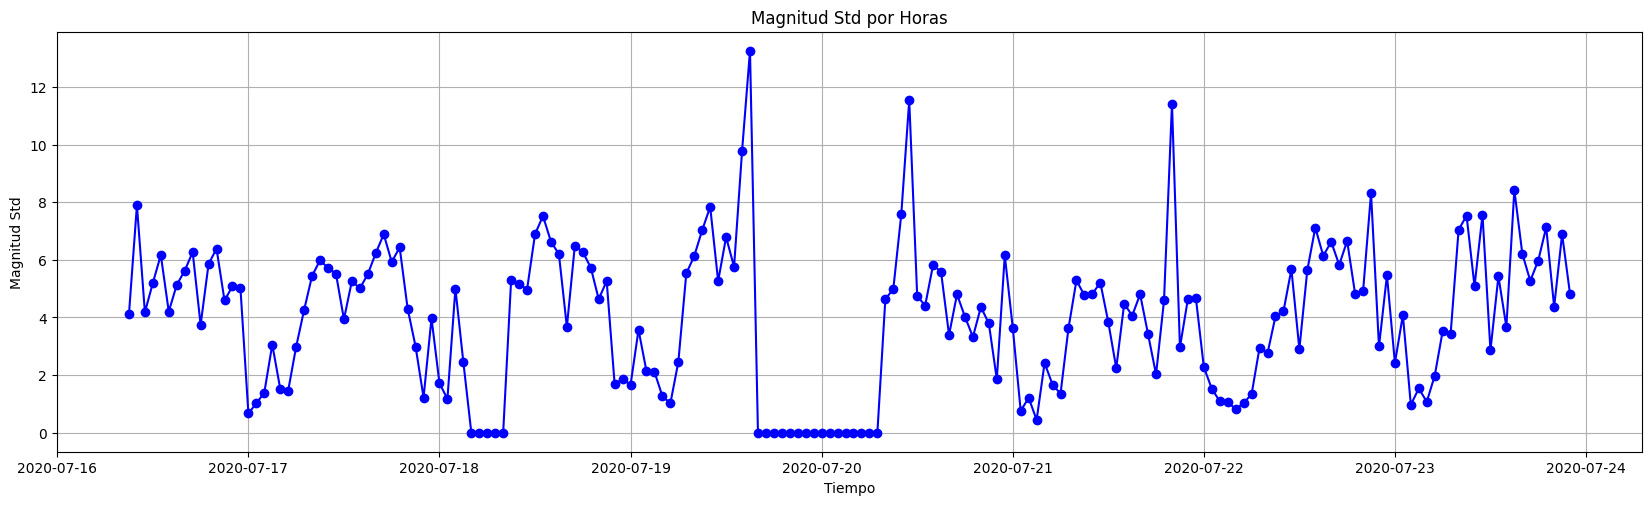

In [562]:
# Graficar magnitude_std
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_hour.index, combined_df_hour['magnitude_std'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud Std')
plt.title('Magnitud Std por Horas')
plt.grid(True)

* Podriamos decir que donde se tienen pendientes pronunciadas y estan llegan a mantenerse en valores distintos al por los siguientes 25 min ( en caso de las graficas por minutos) y 75 min (en caso de las graficas por hora), son la hora de despertar en ese momento del sujeto.

#### Guardamos los datos procesados en csv

In [563]:
combined_df_min.to_csv('ritmo_circadiano_min_'+PACIENTE+'.csv')
combined_df_hour.to_csv('ritmo_circadiano_hour_'+PACIENTE+'.csv')